In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# read csv:
#df = pd.read_csv('time_series_19-covid-Confirmed.csv', sep=';', index_col=0,keep_default_na=False).T
df = pd.read_csv('time_series_19-covid-Confirmed.csv', sep=',')
df.head(9)

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20
0,Anhui,Mainland China,31.8257,117.2264,1,9,15,39,60,70,...,990,990,990,990,990,990,990,990,990,990
1,Beijing,Mainland China,40.1824,116.4142,14,22,36,41,68,80,...,411,413,414,414,418,418,422,426,428,428
2,Chongqing,Mainland China,30.0572,107.8740,6,9,27,57,75,110,...,576,576,576,576,576,576,576,576,576,576
3,Fujian,Mainland China,26.0789,117.9874,1,5,10,18,35,59,...,296,296,296,296,296,296,296,296,296,296
4,Gansu,Mainland China,36.0611,103.8343,0,2,2,4,7,14,...,91,91,91,91,91,102,119,120,124,124
5,Guangdong,Mainland China,23.3417,113.4244,26,32,53,78,111,151,...,1349,1349,1350,1350,1350,1351,1352,1352,1352,1352
6,Guangxi,Mainland China,23.8298,108.7881,2,5,23,23,36,46,...,252,252,252,252,252,252,252,252,252,252
7,Guizhou,Mainland China,26.8154,106.8748,1,3,3,4,5,7,...,146,146,146,146,146,146,146,146,146,146
8,Hainan,Mainland China,19.1959,109.7453,4,5,8,19,22,33,...,168,168,168,168,168,168,168,168,168,168


In [3]:
# re-set the index (row headers):
df2 = df.set_index(['Country/Region','Province/State'])
df2.head(7)

Lat      Long  1/22/20  1/23/20  1/24/20  \
Country/Region Province/State                                                 
Mainland China Anhui           31.8257  117.2264        1        9       15   
               Beijing         40.1824  116.4142       14       22       36   
               Chongqing       30.0572  107.8740        6        9       27   
               Fujian          26.0789  117.9874        1        5       10   
               Gansu           36.0611  103.8343        0        2        2   
               Guangdong       23.3417  113.4244       26       32       53   
               Guangxi         23.8298  108.7881        2        5       23   

                               1/25/20  1/26/20  1/27/20  1/28/20  1/29/20  \
Country/Region Province/State                                                
Mainland China Anhui                39       60       70      106      152   
               Beijing              41       68       80       91      111   
               Chongqing            57       75      110      132      147   
               Fujian               18       35       59       80       84   
               Gansu                 4        7       14       19       24   
               Guangdong            78      111      151      207      277   
               Guangxi              23       36       46       51       58   

                               ...  2/29/20  3/1/20  3/2/20  3/3/20  3/4/20  \
Country/Region Province/State  ...                                            
Mainland China Anhui           ...      990     990     990     990     990   
               Beijing         ...      411     413     414     414     418   
               Chongqing       ...      576     576     576     576     576   
               Fujian          ...      296     296     296     296     296   
               Gansu           ...       91      91      91      91      91   
               Guangdong       ...     1349    1349    1350    1350    1350   
               Guangxi         ...      252     252     252     252     252   

                               3/5/20  3/6/20  3/7/20  3/8/20  3/9/20  
Country/Region Province/State                                          
Mainland China Anhui              990     990     990     990     990  
               Beijing            418     422     426     428     428  
               Chongqing          576     576     576     576     576  
               Fujian             296     296     296     296     296  
               Gansu              102     119     120     124     124  
               Guangdong         1351    1352    1352    1352    1352  
               Guangxi            252     252     252     252     252  

[7 rows x 50 columns]

In [4]:
#remove spurious last column:
df2b = df2.loc[:, ~df2.columns.str.contains('^Unnamed')]
df2b.head(5)

Lat      Long  1/22/20  1/23/20  1/24/20  \
Country/Region Province/State                                                 
Mainland China Anhui           31.8257  117.2264        1        9       15   
               Beijing         40.1824  116.4142       14       22       36   
               Chongqing       30.0572  107.8740        6        9       27   
               Fujian          26.0789  117.9874        1        5       10   
               Gansu           36.0611  103.8343        0        2        2   

                               1/25/20  1/26/20  1/27/20  1/28/20  1/29/20  \
Country/Region Province/State                                                
Mainland China Anhui                39       60       70      106      152   
               Beijing              41       68       80       91      111   
               Chongqing            57       75      110      132      147   
               Fujian               18       35       59       80       84   
               Gansu                 4        7       14       19       24   

                               ...  2/29/20  3/1/20  3/2/20  3/3/20  3/4/20  \
Country/Region Province/State  ...                                            
Mainland China Anhui           ...      990     990     990     990     990   
               Beijing         ...      411     413     414     414     418   
               Chongqing       ...      576     576     576     576     576   
               Fujian          ...      296     296     296     296     296   
               Gansu           ...       91      91      91      91      91   

                               3/5/20  3/6/20  3/7/20  3/8/20  3/9/20  
Country/Region Province/State                                          
Mainland China Anhui              990     990     990     990     990  
               Beijing            418     422     426     428     428  
               Chongqing          576     576     576     576     576  
               Fujian             296     296     296     296     296  
               Gansu              102     119     120     124     124  

[5 rows x 50 columns]

In [5]:
# transpose:
df3 = df2b.T
df3.head(5)

Country/Region Mainland China                                          \
Province/State          Anhui   Beijing Chongqing    Fujian     Gansu   
Lat                   31.8257   40.1824   30.0572   26.0789   36.0611   
Long                 117.2264  116.4142  107.8740  117.9874  103.8343   
1/22/20                1.0000   14.0000    6.0000    1.0000    0.0000   
1/23/20                9.0000   22.0000    9.0000    5.0000    2.0000   
1/24/20               15.0000   36.0000   27.0000   10.0000    2.0000   

Country/Region                                                    ...  \
Province/State Guangdong   Guangxi   Guizhou    Hainan     Hebei  ...   
Lat              23.3417   23.8298   26.8154   19.1959   38.0428  ...   
Long            113.4244  108.7881  106.8748  109.7453  114.5149  ...   
1/22/20          26.0000    2.0000    1.0000    4.0000    1.0000  ...   
1/23/20          32.0000    5.0000    3.0000    5.0000    1.0000  ...   
1/24/20          53.0000   23.0000    3.0000    8.0000    2.0000  ...   

Country/Region    Brunei                    US                    \
Province/State       NaN Bennington County, VT Carver County, MN   
Lat               4.5353               43.0279           44.8254   
Long            114.7277              -73.1350          -93.7842   
1/22/20           0.0000                0.0000            0.0000   
1/23/20           0.0000                0.0000            0.0000   
1/24/20           0.0000                0.0000            0.0000   

Country/Region                                                             \
Province/State Charlotte County, FL Cherokee County, GA Collin County, TX   
Lat                         26.8946             34.2515           33.1795   
Long                       -81.9098            -84.4803          -96.4930   
1/22/20                      0.0000              0.0000            0.0000   
1/23/20                      0.0000              0.0000            0.0000   
1/24/20                      0.0000              0.0000            0.0000   

Country/Region                                                              \
Province/State Jefferson County, KY Jefferson Parish, LA Shasta County, CA   
Lat                         38.1938              29.6499           40.7909   
Long                       -85.6435             -90.1121         -121.8474   
1/22/20                      0.0000               0.0000            0.0000   
1/23/20                      0.0000               0.0000            0.0000   
1/24/20                      0.0000               0.0000            0.0000   

Country/Region                         
Province/State Spartanburg County, SC  
Lat                           34.8606  
Long                         -81.9535  
1/22/20                        0.0000  
1/23/20                        0.0000  
1/24/20                        0.0000  

[5 rows x 266 columns]

In [6]:
# remove Lat/Long rows
df4 = df3.drop(['Lat','Long'])
df4.tail(3)

Country/Region Mainland China                                            \
Province/State          Anhui Beijing Chongqing Fujian  Gansu Guangdong   
3/7/20                  990.0   426.0     576.0  296.0  120.0    1352.0   
3/8/20                  990.0   428.0     576.0  296.0  124.0    1352.0   
3/9/20                  990.0   428.0     576.0  296.0  124.0    1352.0   

Country/Region                                ... Brunei  \
Province/State Guangxi Guizhou Hainan  Hebei  ...    NaN   
3/7/20           252.0   146.0  168.0  318.0  ...    0.0   
3/8/20           252.0   146.0  168.0  318.0  ...    0.0   
3/9/20           252.0   146.0  168.0  318.0  ...    1.0   

Country/Region                    US                                         \
Province/State Bennington County, VT Carver County, MN Charlotte County, FL   
3/7/20                           0.0               0.0                  0.0   
3/8/20                           1.0               0.0                  0.0   
3/9/20                           1.0               1.0                  1.0   

Country/Region                                                             \
Province/State Cherokee County, GA Collin County, TX Jefferson County, KY   
3/7/20                         0.0               0.0                  0.0   
3/8/20                         0.0               0.0                  0.0   
3/9/20                         1.0               1.0                  1.0   

Country/Region                                                                
Province/State Jefferson Parish, LA Shasta County, CA Spartanburg County, SC  
3/7/20                          0.0               0.0                    0.0  
3/8/20                          0.0               0.0                    0.0  
3/9/20                          1.0               1.0                    1.0  

[3 rows x 266 columns]

In [7]:
# fill missing values:
df5 = df4.fillna(value=0)
df5.head(3)

Country/Region Mainland China                                           \
Province/State          Anhui Beijing Chongqing Fujian Gansu Guangdong   
1/22/20                   1.0    14.0       6.0    1.0   0.0      26.0   
1/23/20                   9.0    22.0       9.0    5.0   2.0      32.0   
1/24/20                  15.0    36.0      27.0   10.0   2.0      53.0   

Country/Region                               ... Brunei                    US  \
Province/State Guangxi Guizhou Hainan Hebei  ...    NaN Bennington County, VT   
1/22/20            2.0     1.0    4.0   1.0  ...    0.0                   0.0   
1/23/20            5.0     3.0    5.0   1.0  ...    0.0                   0.0   
1/24/20           23.0     3.0    8.0   2.0  ...    0.0                   0.0   

Country/Region                                                             \
Province/State Carver County, MN Charlotte County, FL Cherokee County, GA   
1/22/20                      0.0                  0.0                 0.0   
1/23/20                      0.0                  0.0                 0.0   
1/24/20                      0.0                  0.0                 0.0   

Country/Region                                                              \
Province/State Collin County, TX Jefferson County, KY Jefferson Parish, LA   
1/22/20                      0.0                  0.0                  0.0   
1/23/20                      0.0                  0.0                  0.0   
1/24/20                      0.0                  0.0                  0.0   

Country/Region                                           
Province/State Shasta County, CA Spartanburg County, SC  
1/22/20                      0.0                    0.0  
1/23/20                      0.0                    0.0  
1/24/20                      0.0                    0.0  

[3 rows x 266 columns]

In [8]:
# convert index to dateTime:
df5.index = pd.DatetimeIndex(df5.index)
df5.loc[:,('Poland',np.nan)]

2020-01-22     0.0
2020-01-23     0.0
2020-01-24     0.0
2020-01-25     0.0
2020-01-26     0.0
2020-01-27     0.0
2020-01-28     0.0
2020-01-29     0.0
2020-01-30     0.0
2020-01-31     0.0
2020-02-01     0.0
2020-02-02     0.0
2020-02-03     0.0
2020-02-04     0.0
2020-02-05     0.0
2020-02-06     0.0
2020-02-07     0.0
2020-02-08     0.0
2020-02-09     0.0
2020-02-10     0.0
2020-02-11     0.0
2020-02-12     0.0
2020-02-13     0.0
2020-02-14     0.0
2020-02-15     0.0
2020-02-16     0.0
2020-02-17     0.0
2020-02-18     0.0
2020-02-19     0.0
2020-02-20     0.0
2020-02-21     0.0
2020-02-22     0.0
2020-02-23     0.0
2020-02-24     0.0
2020-02-25     0.0
2020-02-26     0.0
2020-02-27     0.0
2020-02-28     0.0
2020-02-29     0.0
2020-03-01     0.0
2020-03-02     0.0
2020-03-03     0.0
2020-03-04     1.0
2020-03-05     1.0
2020-03-06     5.0
2020-03-07     5.0
2020-03-08    11.0
2020-03-09    16.0
Name: (Poland, nan), dtype: float64

In [9]:
# divide by population density.  first had this via separate csv files, 
# but the "countries" are not stable in the upstream data
df5.loc[:,('Mainland China','Beijing')] /= 22.
df5.loc[:,('Mainland China','Hubei')] /= 60.
df5.loc[:,('Japan',np.nan)] /= 126.8
df5.loc[:,('South Korea',np.nan)] /= 52.
df5.loc[:,('Singapore',np.nan)] /= 5.85
df5.loc[:,('France',np.nan)] /= 67.
df5.loc[:,('Germany',np.nan)] /= 82.79
df5.loc[:,('Italy',np.nan)] /= 60.5
df5.loc[:,('Switzerland',np.nan)] /= 8.57
df5.loc[:,('Poland',np.nan)] /= 4.
df5.loc[:,('Poland',np.nan)]

2020-01-22    0.00
2020-01-23    0.00
2020-01-24    0.00
2020-01-25    0.00
2020-01-26    0.00
2020-01-27    0.00
2020-01-28    0.00
2020-01-29    0.00
2020-01-30    0.00
2020-01-31    0.00
2020-02-01    0.00
2020-02-02    0.00
2020-02-03    0.00
2020-02-04    0.00
2020-02-05    0.00
2020-02-06    0.00
2020-02-07    0.00
2020-02-08    0.00
2020-02-09    0.00
2020-02-10    0.00
2020-02-11    0.00
2020-02-12    0.00
2020-02-13    0.00
2020-02-14    0.00
2020-02-15    0.00
2020-02-16    0.00
2020-02-17    0.00
2020-02-18    0.00
2020-02-19    0.00
2020-02-20    0.00
2020-02-21    0.00
2020-02-22    0.00
2020-02-23    0.00
2020-02-24    0.00
2020-02-25    0.00
2020-02-26    0.00
2020-02-27    0.00
2020-02-28    0.00
2020-02-29    0.00
2020-03-01    0.00
2020-03-02    0.00
2020-03-03    0.00
2020-03-04    0.25
2020-03-05    0.25
2020-03-06    1.25
2020-03-07    1.25
2020-03-08    2.75
2020-03-09    4.00
Name: (Poland, nan), dtype: float64

In [16]:
# time-shifted Hubei values:
hb = df5["Mainland China","Hubei"]
hb.index = pd.date_range(start="2020-03-05",periods=hb.size)
hb.name=("Mainland China","Hubei time-shifted")
hb.tail(3)

2020-04-19    1127.766667
2020-04-20    1128.450000
2020-04-21    1129.050000
Freq: D, Name: (Mainland China, Hubei time-shifted), dtype: float64

In [17]:
df5b = pd.concat([df5,hb],axis=1) #.fillna(value=0)
df5b.loc['2020-03-08':'2020-03-10',('Germany',np.nan)]

2020-03-08    12.561904
2020-03-09    14.204614
2020-03-10          NaN
Freq: D, Name: (Germany, nan), dtype: float64

In [18]:
# extract regions we are interested in:
df6 = df5b.loc[:,[
    ('Mainland China','Hubei'),
    ('Mainland China','Beijing'),
    ('Germany',''),
    ('Italy',''),
    ('Japan',''),
    ('France',''),
    ('Switzerland',''),
    ('Singapore',''),
    ('South Korea',''),
    ('Mainland China','Hubei time-shifted'),
    ('Poland','')
]]
df6.tail(5)

Country/Region Mainland China         Germany Italy Japan France Switzerland  \
Province/State          Hubei Beijing     NaN   NaN   NaN    NaN         NaN   
2020-04-17                NaN     NaN     NaN   NaN   NaN    NaN         NaN   
2020-04-18                NaN     NaN     NaN   NaN   NaN    NaN         NaN   
2020-04-19                NaN     NaN     NaN   NaN   NaN    NaN         NaN   
2020-04-20                NaN     NaN     NaN   NaN   NaN    NaN         NaN   
2020-04-21                NaN     NaN     NaN   NaN   NaN    NaN         NaN   

Country/Region Singapore South Korea     Mainland China Poland  
Province/State       NaN         NaN Hubei time-shifted    NaN  
2020-04-17           NaN         NaN        1124.433333    NaN  
2020-04-18           NaN         NaN        1126.533333    NaN  
2020-04-19           NaN         NaN        1127.766667    NaN  
2020-04-20           NaN         NaN        1128.450000    NaN  
2020-04-21           NaN         NaN        1129.050000    NaN

<Figure size 864x504 with 0 Axes>

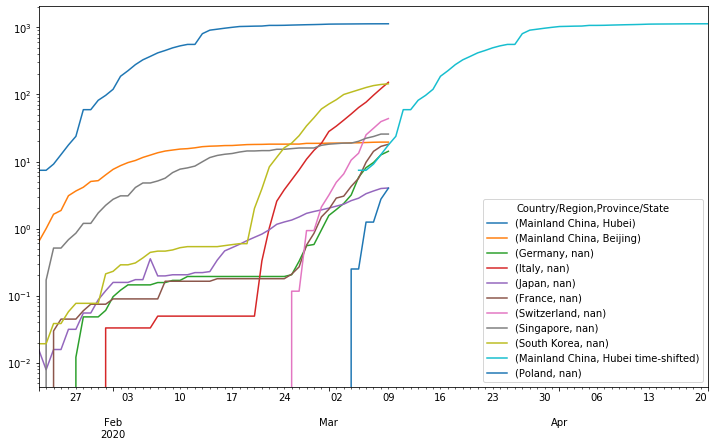

In [19]:
plt.close('all')
plt.rcParams['figure.figsize']=[12,7]
plt.figure()
df6.plot(kind='line',logy=True)


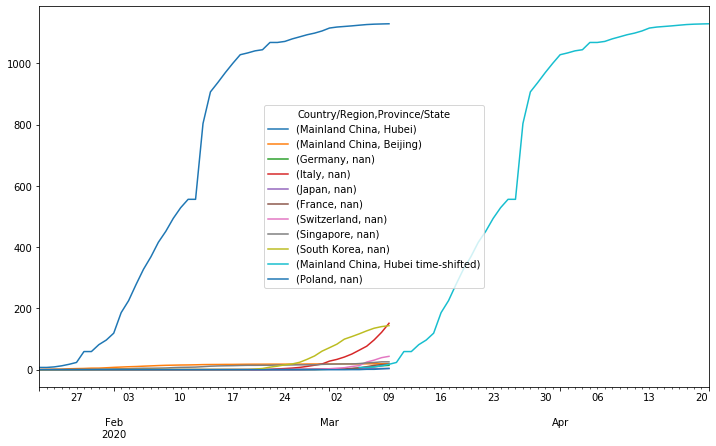

In [20]:
df6.plot(kind='line')

In [272]:
df6.loc[:,('Poland',np.nan)].to_string()

'2020-01-22    0.0\n2020-01-23    0.0\n2020-01-24    0.0\n2020-01-25    0.0\n2020-01-26    0.0\n2020-01-27    0.0\n2020-01-28    0.0\n2020-01-29    0.0\n2020-01-30    0.0\n2020-01-31    0.0\n2020-02-01    0.0\n2020-02-02    0.0\n2020-02-03    0.0\n2020-02-04    0.0\n2020-02-05    0.0\n2020-02-06    0.0\n2020-02-07    0.0\n2020-02-08    0.0\n2020-02-09    0.0\n2020-02-10    0.0\n2020-02-11    0.0\n2020-02-12    0.0\n2020-02-13    0.0\n2020-02-14    0.0\n2020-02-15    0.0\n2020-02-16    0.0\n2020-02-17    0.0\n2020-02-18    0.0\n2020-02-19    0.0\n2020-02-20    0.0\n2020-02-21    0.0\n2020-02-22    0.0\n2020-02-23    0.0\n2020-02-24    0.0\n2020-02-25    0.0\n2020-02-26    0.0\n2020-02-27    0.0\n2020-02-28    0.0\n2020-02-29    0.0\n2020-03-01    0.0\n2020-03-02    0.0\n2020-03-03    0.0\n2020-03-04    0.0\n2020-03-05    0.0\n2020-03-06    0.0\n2020-03-07    0.0\n2020-03-08    NaN\n2020-03-09    NaN\n2020-03-10    NaN\n2020-03-11    NaN\n2020-03-12    NaN\n2020-03-13    NaN\n2020-03-14 

In [267]:
df6.loc[:,('Poland',np.nan)]

2020-01-22    0.0
2020-01-23    0.0
2020-01-24    0.0
2020-01-25    0.0
2020-01-26    0.0
             ... 
2020-04-15    NaN
2020-04-16    NaN
2020-04-17    NaN
2020-04-18    NaN
2020-04-19    NaN
Freq: D, Name: (Poland, nan), Length: 89, dtype: float64

In [183]:
df5.loc[:,('Mainland China','Anhui')] /= 9999999.
df5.head(3)

Country/Region Mainland China                                           \
Province/State          Anhui Beijing Chongqing Fujian Gansu Guangdong   
2020-01-22       1.000000e-07    14.0       6.0    1.0   0.0      26.0   
2020-01-23       9.000001e-07    22.0       9.0    5.0   2.0      32.0   
2020-01-24       1.500000e-06    36.0      27.0   10.0   2.0      53.0   

Country/Region                               ...              US  \
Province/State Guangxi Guizhou Hainan Hebei  ... Polk County, GA   
2020-01-22         2.0     1.0    4.0   1.0  ...             0.0   
2020-01-23         5.0     3.0    5.0   1.0  ...             0.0   
2020-01-24        23.0     3.0    8.0   2.0  ...             0.0   

Country/Region                                                            \
Province/State Riverside County, CA Shelby County, TN Spokane County, WA   
2020-01-22                      0.0               0.0                0.0   
2020-01-23                      0.0               0.0                0.0   
2020-01-24                      0.0               0.0                0.0   

Country/Region                                                            \
Province/State St. Louis County, MO Suffolk County, NY Ulster County, NY   
2020-01-22                      0.0                0.0               0.0   
2020-01-23                      0.0                0.0               0.0   
2020-01-24                      0.0                0.0               0.0   

Country/Region                                                                  
Province/State Unassigned Location, VT Unknown Location, MA Volusia County, FL  
2020-01-22                         0.0                  0.0                0.0  
2020-01-23                         0.0                  0.0                0.0  
2020-01-24                         0.0                  0.0                0.0  

[3 rows x 255 columns]

In [51]:
df5.to_csv("all.csv")

In [ ]:
df6['idx'] = df6.reset_index().index
df6.tail(3)

In [ ]:
df6.to_csv("reduced.csv",sep='\t',header=False)

In [43]:
df6.iterrows?

In [88]:
hb = df6["Mainland China"]["Hubei"]
hb.index = pd.date_range(start="2020-02-22",periods=hb.size)
hb.head(3)

2020-02-22    7.40
2020-02-23    7.40
2020-02-24    9.15
Freq: D, Name: Hubei, dtype: float64

In [77]:
hb.index = pd.DatetimeIndex?

In [82]:
pd.date_range(start="2020-01-22",periods=5)

DatetimeIndex(['2020-01-22', '2020-01-23', '2020-01-24', '2020-01-25',
               '2020-01-26'],
              dtype='datetime64[ns]', freq='D')

2020-02-22    7.40
2020-02-23    7.40
2020-02-24    9.15
Freq: D, Name: Hubei, dtype: float64